<table width="100%">
    <td align="left">
        <a target="_blank", href="https://www.up.pt/fcup/en/">
            <img src="https://divulgacao.iastro.pt/wp-content/uploads/2023/03/FCUP_logo-print_blcktransp_600ppi.png" width="90px" height="90px" style="padding-bottom:5px;"/>
        </a>
    </td>
    <td>
        <a target="_blank", href="https://www.iastro.pt/">
            <img src="https://divulgacao.iastro.pt/wp-content/uploads/2018/03/IA_logo_bitmap-rgbblack-1200px-388x259.png" width="90px" height="90px" style="padding-bottom:5px;"/>
        </a>
    </td>
    <td align="center">
        <a target="_blank" href="https://colab.research.google.com/github/jbrinchmann/MLD2025/blob/main/Notebooks/MLD2025-11-Simple%20distributions.ipynb">
           <img src="https://tinyurl.com/3mm2cyk6"  width="90px" height="90px" style="padding-bottom:5px;"/>Run in Google Colab
        </a>
    </td>
<td align="center"><a target="_blank" href="https://github.com/jbrinchmann/MLD2025/blob/main/Notebooks/MLD2025-11-Simple%20distributions.ipynb">
<img src="https://tinyurl.com/25h5fw53"  width="90px" height="60px" style="padding-bottom:0px;"  />View Source on GitHub</a></td>
</table>

## Distributions

A wide range of probability distributions are available in <tt>scipy.stats</tt>. They all have a generic structure <tt>scipy.stats.&lt;distribution&gt;</tt>, where the distribution name is best looked up in the scipy.stats documentation.

Each distribution can be initialised like

  <tt>dist = scipy.stats.&lt;distribution&gt;(&lt;parameters&gt;)</tt>

so for a normal distribution with mean 0.4 and width 1.5 we would write
  <tt>n = scipy.stats.norm(0.4, 1.5) </tt>

The <tt>dist</tt> variable can then be used to get values from the probability distribution function (PDF) using the <tt>pdf</tt> function or draw samples from the PDF using the <tt>rvs</tt> function. Note that for <em>discrete</em> distributions (e.g. Poisson, Binominal, Multinominal) the correct quantity is the probability mass function (PMF) and the routine is called <tt>pmf</tt>. The cumulative distribution function (CDF) can be accessed using the <tt>cdf</tt> function and a wide range of other functionalities are available. Here I will just show the basic usage of a few of these distributions

In [1]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# This modifies the frozen distributions so that I can get its name for plotting purposes.
ss.distributions.rv_frozen.name = property(lambda self: self.dist.name)

In [3]:
def plot_distribution(d, xmin, xmax):
    """
    Create a simple plot of the PDF and CDF of a distribution.
    I will use this frequently below. 
    """
    x = np.linspace(xmin, xmax, num=100)
    
    # I do not know whether the distribution is discrete or not. A simple way to check
    # is to use a try except clause (this is not fool-proof though since if d is not a 
    # distribution it will fail.)
    try:
        y_pdf = d.pdf(x)
        discrete = False
    except:
        # Ok, a discrete sample - then we want x to contain integers
        x = np.arange(xmin, xmax+1)
        y_pdf = d.pmf(x)
        discrete = True
        
    y_cdf = d.cdf(x)

    f, ax = plt.subplots(1, 2)
    plt.tight_layout(w_pad=1.5, h_pad=1.0)
    
    if discrete:
        ax[0].plot(x, y_pdf, 'ro-')
    else:
        ax[0].plot(x, y_pdf, 'r-')
    ax[0].set_title(d.name+' - PDF')
    ax[0].set_ylim(0, 1.1*np.nanmax(y_pdf))
    ax[0].set_xlabel('x')
    ax[0].set_ylabel('p(x)')
    ax[1].plot(x, y_cdf, 'b-')
    ax[1].set_title(d.name+' - CDF')
    ax[1].set_xlabel('x')
    ax[1].set_ylabel('p(>x)')

## The Uniform distribution

This is the simplest distribution around. It is simply constant in a range.

<b>Parameters</b>: Left side of range and Width of range.

So to set up a uniform distribution between 1 and 5, we can do:

In [4]:
left = 1.0
width = 4.0
u = ss.uniform(left, width)

Next, I would like to plot the distribution. To do this I first create a variable x
for the locations I want to have an estimate of the PDF and the CDF. Note that I plot the PDF on the left and the CDF on the right. Note that the edges on the PDF are not perfectly vertical - due to the finite sampling on the x-axis.

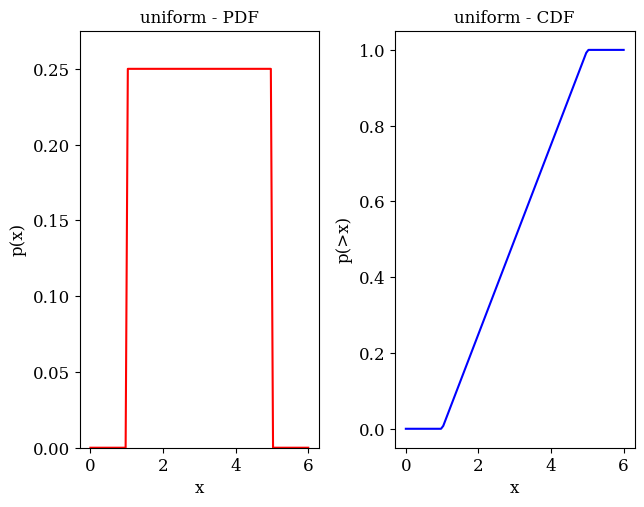

In [5]:
plot_distribution(u, 0, 6)

Next, let us draw 100 random variables from the distribution. 

Sample mean=3.001


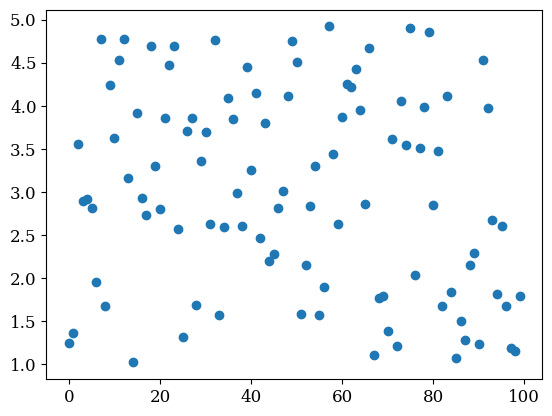

In [6]:
r_x = u.rvs(100)
plt.plot(r_x, 'o')
print("Sample mean={0:.3f}".format(np.mean(r_x)))

The uniform distribution is particularly useful if your variable has a particularly weird distribution that is not supported by a standard distribution. If a value $y$ can be written as $\Phi(x)$, then the distribution of $y$ is given by $p_Y(y) = p_X(\Phi^{-1}(y)) \left|\frac{d\Phi^{-1}(y)}{dy}\right|$

Here I have added a subscript $X$ and $Y$ to highlight which distribution we are talking about. To take a specific example, let us assume that $y = \sqrt{x}$ with $x$ taken from the uniform distribution above we have $x = \Phi^{-1}(y) = y^2$ and the derivative is then $2y = 2\sqrt{x}$ so we get

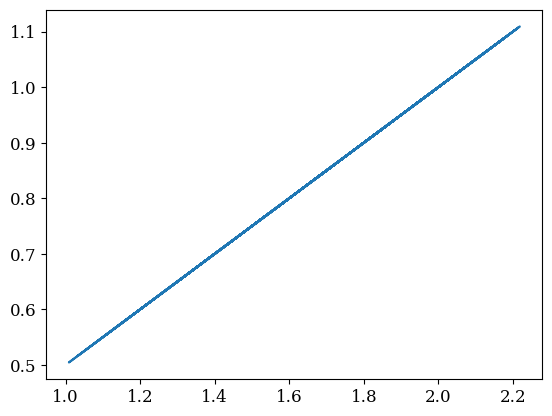

In [7]:

y_sqrt = 2*np.sqrt(r_x)*u.pdf(r_x)
plt.plot(np.sqrt(r_x), y_sqrt)

There are quite a few other functions you might find useful in this package. Here are the functions to calculate the mean, the 0.1 quantile and the standard deviation.

In [8]:
u.mean(), u.ppf(0.1), u.std()

(3.0, 1.4, 1.1547005383792515)

## The normal distribution

Arguably the most frequently encountered distribution is the normal distribution - in part this is due to the central limit theorem. This is defined through

$$p(x|\mu, \sigma) = \frac{1}{\sigma \sqrt{2\pi}} e^{-(x-\mu)^2/2\sigma^2}$$

where $\mu$ is the mean and $\sigma$ is the standard deviation ("width") of the distribution - this is often written as $N(\mu, \sigma^2)$ because the variance, $\sigma^2$, often is more convenient for calculations

The normal distribution is called <tt>norm</tt> in <tt>scipy.stats</tt>, and to create a Gaussian distribution with $\mu=3.5$ and $\sigma=1.8$ we can do:

In [9]:
n = ss.norm(3.5, 1.8)

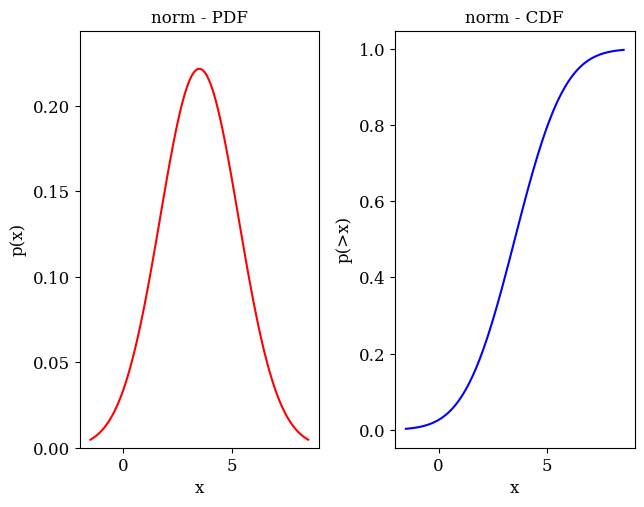

In [10]:
plot_distribution(n, 3.5-5, 3.5+5)

Let us now assume that we now take 1000 observations of the same (non-variable) star. The true value is going to be 5 and the noise is taken to to be 1.0 so that we have a S/N of 5, I will then transform these fluxes to magnitudes and compare the distributions.

In [11]:
n = ss.norm(5.0, 1.0)
fluxes = n.rvs(1000)
magnitudes = -2.5*np.log10(fluxes)

Text(0, 0.5, 'p(m)')

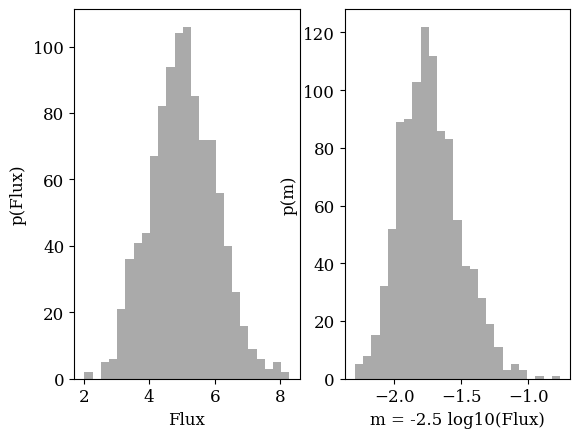

In [12]:
f, ax = plt.subplots(1, 2)

h1 = ax[0].hist(fluxes, bins=25, color='#aaaaaa')
ax[0].set_xlabel('Flux')
ax[0].set_ylabel('p(Flux)')
h2 = ax[1].hist(magnitudes, bins=25, color='#aaaaaa')
ax[1].set_xlabel('m = -2.5 log10(Flux)')
ax[1].set_ylabel('p(m)')

<b>Try</b>: Modify the code above to overplot the theoretically expected distributions on each panel in red.

## The Poisson distribution

The expected number of photons in a given period of time is distributed as a Poisson distribution and quite a few other quantities in astronomy. Thus it is a very useful distribution to know as well. It is defined mathematically as 

 $$p(k|\lambda) = \frac{\lambda^k e^{-\lambda}}{k!} $$
 
 and the Python function requires one parameter - the mean, $\lambda$. The mode of the distribution is then given by $\lambda-1$ and the standard deviation as $\sqrt{\lambda}$ - and other statistical quantities can also be derived from $\lambda$.

In [13]:
p = ss.poisson(4)

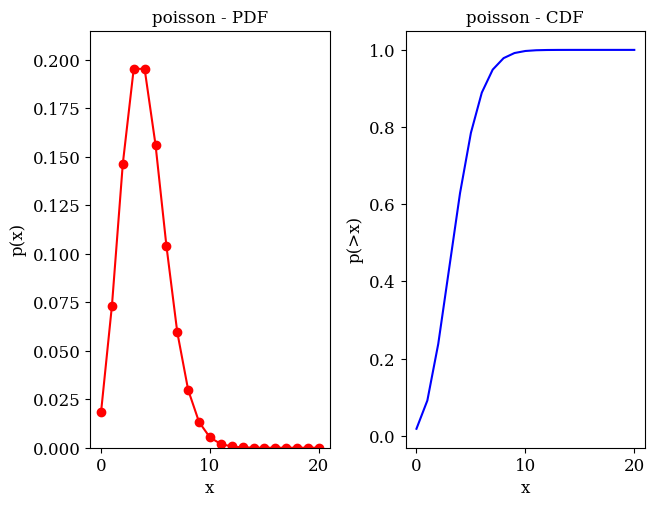

In [14]:
plot_distribution(p, 0, 20)

Sample mean=4.290


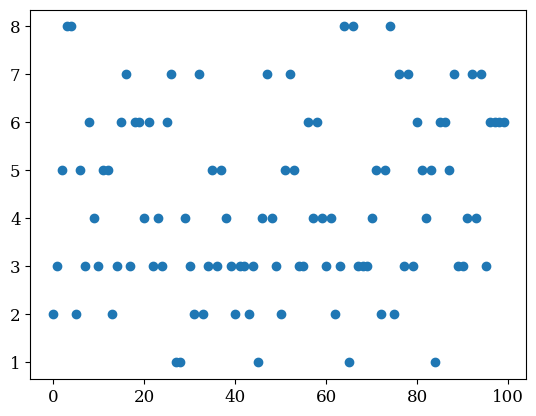

In [15]:
r_x = p.rvs(100)
plt.plot(r_x, 'o')
print("Sample mean={0:.3f}".format(np.mean(r_x)))

## The Exponential & Laplace distribution

This distribution is defined through 

$$p(x|\mu, \sigma) = \frac{1}{2\sigma} e^{-|x-\mu|/\sigma} $$

This distribution when defined for all $x$ is often referred to as the Laplace distribution. If the distribution is confined to $x-\mu>0$, it is often called the exponential distribution.  In <tt>scipy.stats</tt> the Laplace distribution is implemented in the <tt>laplace</tt> function  and the exponential in the <tt>expon</tt> function. 

In [16]:
e = ss.expon(3.5, 2.0)
l = ss.laplace(3.5, 2.0)

In [17]:
x = np.linspace(-3, 10, num=100)

# The mean-value theorem

Let us do a simple set of drawing M realisations from a uniform distribution and then calculate the mean of these and look at the distribution of these for large numbers of values.

In [18]:
def draw_from_uniform(M=10, N_reps=10000):

    means = np.zeros(N_reps)
    # Uniform distribution between 0 and 1
    p = ss.uniform(0.0, 1.0)
    for i in range(N_reps):
        x = p.rvs(M)
        means[i] = np.mean(x)

    return means
        

In [19]:
m = draw_from_uniform(M=3, N_reps=10000)

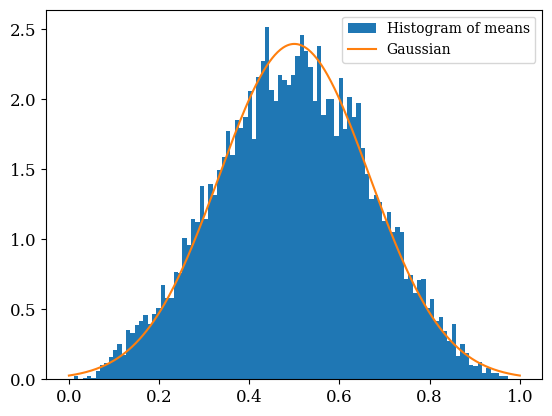

In [20]:
xplot = np.linspace(0, 1, 500)
h = plt.hist(m, bins=100, density=True, label='Histogram of means')
sigma_uniform = (1.0/np.sqrt(3*12)) # (b-a)/sqrt(12*M)
p = ss.norm(0.5, sigma_uniform)
plt.plot(xplot, p.pdf(xplot), label='Gaussian')
plt.legend()

## Show multiple distributions for the lecture.

Here we compare a few different sampling setups.

In [23]:
def show_one_mean_val(M=10, ax=None, N_reps=1000):
    
    
    m = draw_from_uniform(M=M, N_reps=N_reps)
    xplot = np.linspace(0, 1, 500)
    sigma_uniform = 1.0/np.sqrt(M*12) # (b-a)/sqrt(12)
    p = ss.norm(0.5, sigma_uniform)

    if ax is None:
        fig,ax = plt.subplots(ncols=1, nrows=1)
    h = ax.hist(m, bins=75, density=True, label='Histogram of means')
    ax.plot(xplot, p.pdf(xplot), label='Gaussian')



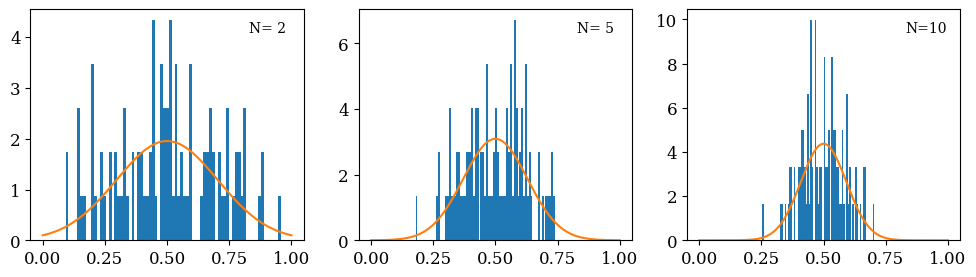

In [24]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(12, 3))
Ns = [2, 5, 10]
for i, N in enumerate(Ns):
    # Increase N_reps to 50000 to create the figure
    show_one_mean_val(M=N, ax=axes[i], N_reps=100)
    axes[i].text(0.8, 0.9, "N={0:2d}".format(N), transform=axes[i].transAxes)

#plt.savefig("central_limit_theorem.pdf")

# The bootstrap

A simple bootstrap resampling is not difficult to implement manually but there is a `scipy` library for it. So let me first try it manually and then use the library.

We first draw some random variables from the exponential distribution:

In [94]:
p_exp = ss.expon(3.5, 2.0)
N_x = 10
x = p_exp.rvs(N_x)

Next, we have to draw with replacement from this x and then calculate the mean (which is what I'll try here). I do this slightly more complex than normal because I draw random indices instead of directly from x because that is much more useful in situations where you have multi-dimensional data.

In [88]:
rng = np.random.default_rng()
N_boot = 1000
means = np.zeros(N_boot)

for i in range(N_boot):
    # Draw random indices - and draw N_x of these
    ix_boot = rng.choice(len(x), size=len(x), replace=True)
    x_boot = x[ix_boot]
    means[i] = np.mean(x[ix_boot])

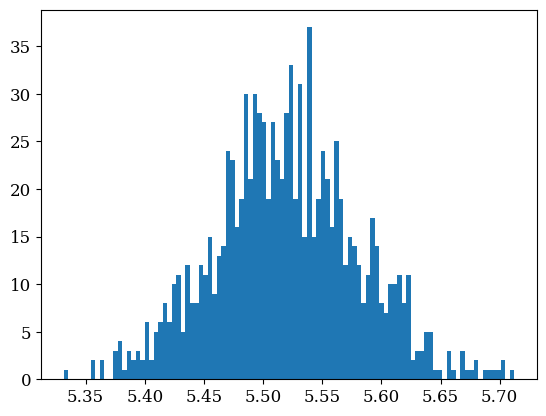

In [89]:
h= plt.hist(means, bins=100)

Then print the result

In [90]:
mn = np.mean(x)
qs = np.quantile(means, [0.16, 0.84])
print("Mean = {0:.3f} with 16%-84% range [{1:.3f}, {2:.3f}]".format(mn, qs[0], qs[1]))

Mean = 5.521 with 16%-84% range [5.462, 5.581]


## Using scipy's bootstrap

You will get somewhat different results from the above because the detailed algorithm is somewhat more sophisticated, in particular for the calculation of the confidence intervals when you have small numbers of datapoints. For larger N the two approaches will give very similar results.

In [91]:
from scipy.stats import bootstrap

data = (x,)  # samples must be in a sequence

res = bootstrap(data, np.mean, confidence_level=0.68, random_state=rng)

This returns a dict with the actual bootstrapped calculates (`res.boostrap_distribution`) which you can use to calculate a distribution like the one above, as well as the confidence interval which I print below:

In [92]:
res.confidence_interval

ConfidenceInterval(low=5.459695835830621, high=5.586760737642729)